In [1]:
#This tutorial was adapted from Zach Gold and Ben Hamner via Kaggle. The examples have been modified to match the teaching objectives of this lecture

# Referrence:
#https://www.kaggle.com/code/omarmaher21/data-understanding, https://www.kaggle.com/code/titassaha/salary-insights-eda-linear-regression , https://www.kaggle.com/code/borhandarvishi/general-understanding-of-data

#We will be using pandas for loading the csv file into a dataframe
import pandas as pd

#matplotlib is a python library for basic graph plotting
import matplotlib.pyplot as plt

#seaborn is another python graphing library that is built upon matplotlib and allows you to optimize matplotlib's output
import seaborn as sns 

#switching from matplotlib's default graphing style to that of seaborn's. Seaborn displays graph lines, matplotlib doesn't
sns.set(color_codes = True)

#removing warnings from the output
import warnings
warnings.filterwarnings("ignore")

In [2]:
data_salary= pd.read_csv('https://raw.githubusercontent.com/Christ244/Chase/main/ds_salaries.csv')

In [3]:
data_salary

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [4]:
data_salary.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [5]:
# using the fuction to get the describe to get the count,mean,std and etc
data_salary.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [6]:
data_salary["job_title"].value_counts()

Data Engineer                          1040
Data Scientist                          840
Data Analyst                            612
Machine Learning Engineer               289
Analytics Engineer                      103
                                       ... 
Principal Machine Learning Engineer       1
Azure Data Engineer                       1
Manager Data Management                   1
Marketing Data Engineer                   1
Finance Data Analyst                      1
Name: job_title, Length: 93, dtype: int64

<Axes: xlabel='experience_level', ylabel='salary_in_usd'>

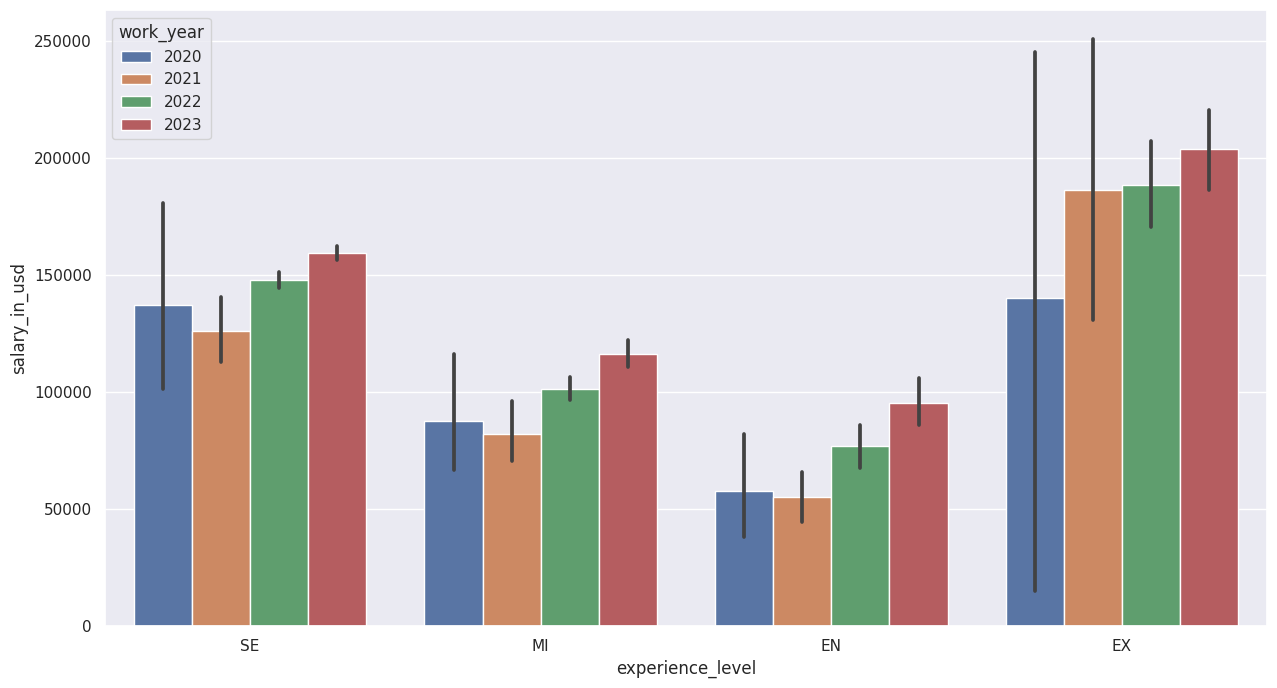

In [7]:
# Using the plot figure to get the experience level and the salary in the USD and work years as well
plt.figure(figsize=(15,8))
sns.barplot(data=data_salary,x='experience_level',y='salary_in_usd',hue='work_year')

<Axes: xlabel='experience_level', ylabel='salary'>

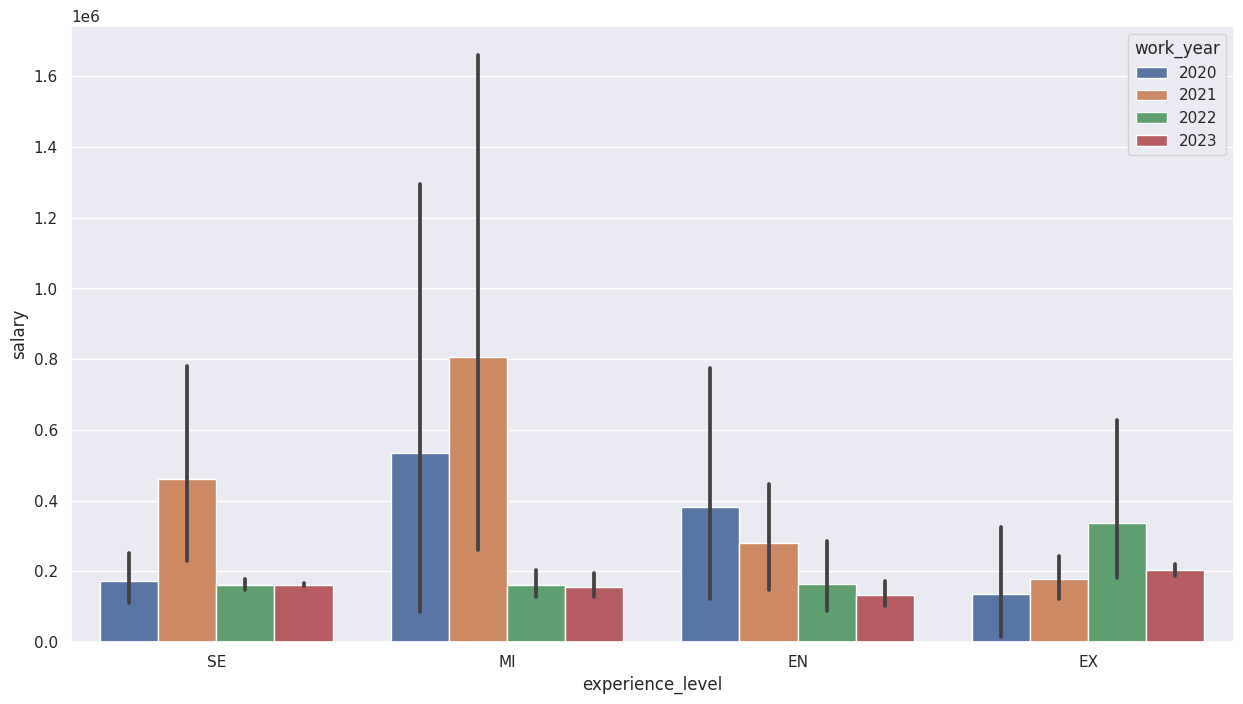

In [8]:
# Using the plot figure to get the experience level and the salary and work years as well
plt.figure(figsize=(15,8))
sns.barplot(data=data_salary,x='experience_level',y='salary',hue='work_year')

<Axes: xlabel='company_size', ylabel='salary_in_usd'>

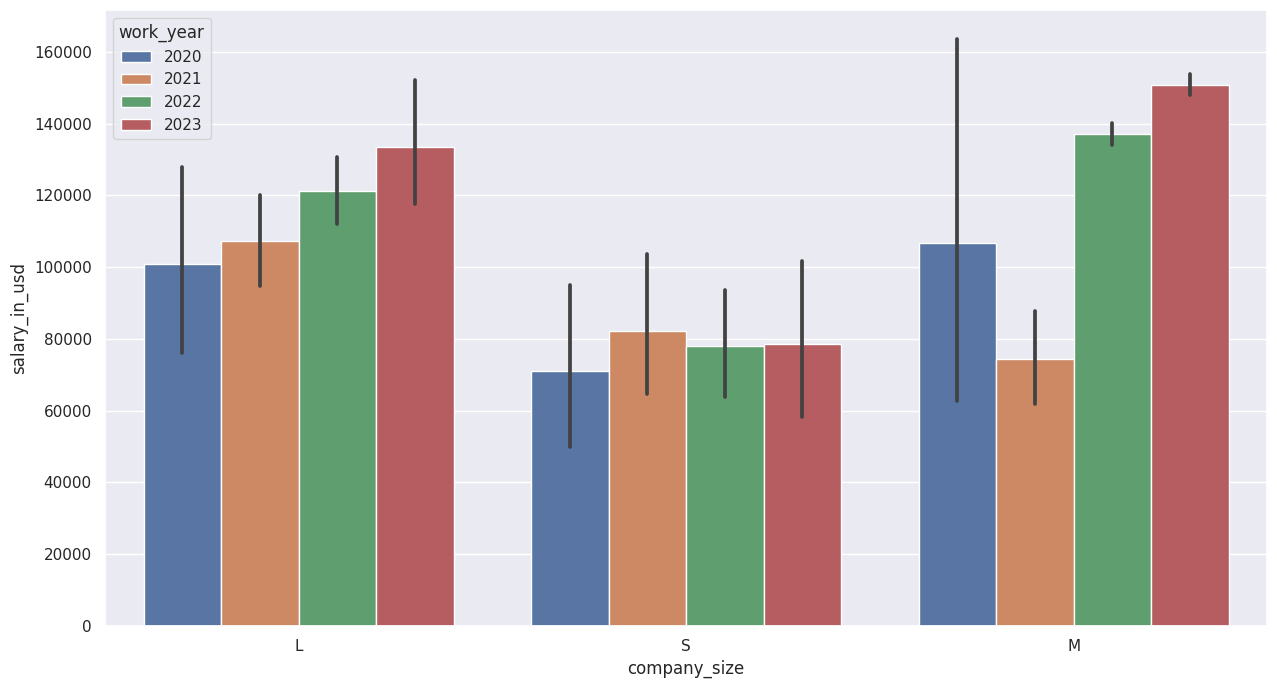

In [9]:
# Using the plot figure to get the company_size and the salary in the USD and work years as well
plt.figure(figsize=(15,8))
sns.barplot(data=data_salary,x='company_size',y='salary_in_usd',hue='work_year')

In [10]:
# using the groupby to get the job title and salary in USD to read better on Job title to see the salary. 
top_salary =  data_salary.groupby('job_title').agg({'salary_in_usd':'mean'}).round(2).sort_values('salary_in_usd', ascending=False).head(10)
top_salary.head(10)

,salary_in_usd
job_title,
Data Science Tech Lead,375000.00
Cloud Data Architect,250000.00
Data Lead,212500.00
Data Analytics Lead,211254.50
Principal Data Scientist,198171.12
Director of Data Science,195140.73
Principal Data Engineer,192500.00
Machine Learning Software Engineer,192420.00
Data Science Manager,191278.78


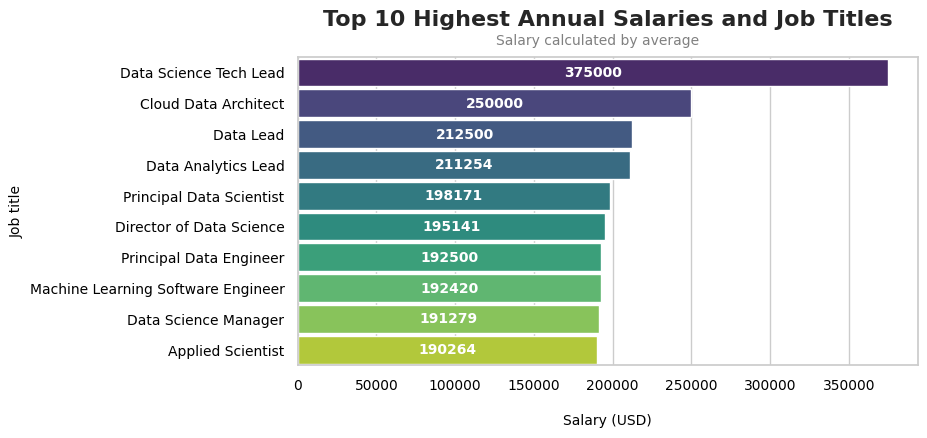

In [11]:
# Using the plot figure to get the Top 10 Highest Annual Salaries and Job Titles to see which job tittle make the more or the less
plt.figure(figsize=(8,4))

sns.set(style="whitegrid")
ax= sns.barplot(y = top_salary.index, x ='salary_in_usd', 
            data = top_salary,           
            palette = "viridis",
            width=0.9)
            
plt.title('Top 10 Highest Annual Salaries and Job Titles\n', fontsize=16, fontweight="bold", loc="center")
plt.suptitle("\nSalary calculated by average\n", fontsize = 10, color="gray")
plt.xlabel('\nSalary (USD)', color="black", fontsize=10)
plt.ylabel('Job title', color="black", fontsize=10)
plt.xticks(fontsize=10, color="black")
plt.yticks(fontsize=10, color="black")

for i in ax.containers:
    ax.bar_label(i, size=10, label_type = "center", color="white", fontweight="bold")

plt.show()

(array([-100000.,       0.,  100000.,  200000.,  300000.,  400000.,
         500000.]),
 [Text(0, -100000.0, '−100000'),
  Text(0, 0.0, '0'),
  Text(0, 100000.0, '100000'),
  Text(0, 200000.0, '200000'),
  Text(0, 300000.0, '300000'),
  Text(0, 400000.0, '400000'),
  Text(0, 500000.0, '500000')])

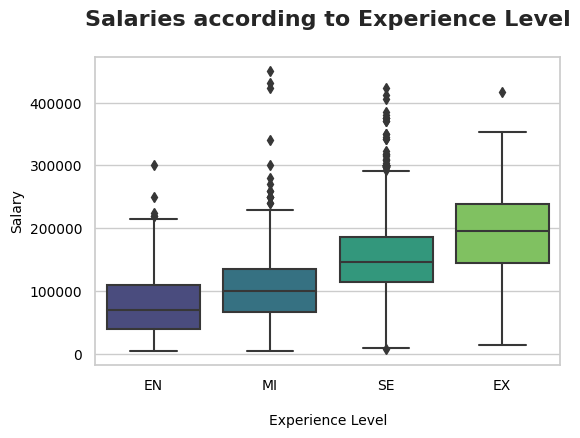

In [12]:
# Using the array to build the code and boxplot to get the Salaries according to Experience Level. Also, to see when you start how money you going to make and then after you build the experience the salary would increase
plt.figure(figsize=(6,4))

median_salary = data_salary.groupby('experience_level')['salary_in_usd'].median().reset_index().sort_values('salary_in_usd')

sns.boxplot(data=data_salary, x='experience_level', y='salary_in_usd', 
            order=median_salary['experience_level'], 
            palette="viridis")

plt.title("Salaries according to Experience Level\n", fontsize=16, fontweight="bold", loc="center")
plt.xlabel("\nExperience Level", color="black", fontsize=10)
plt.ylabel("Salary", color="black", fontsize=10)
plt.xticks(fontsize=10, color="black")
plt.yticks(fontsize=10, color="black")

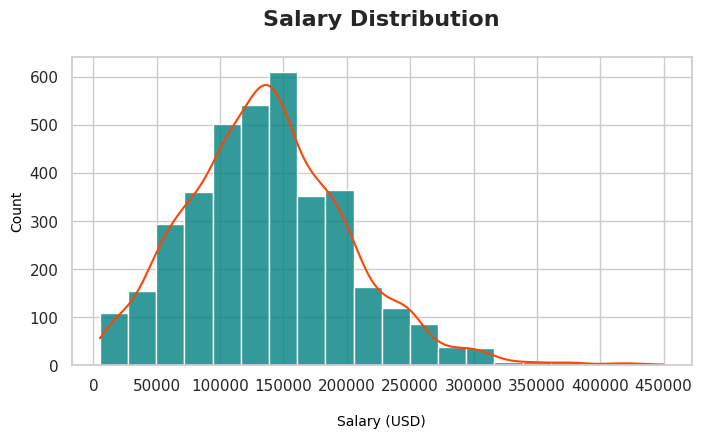

In [13]:
#Using the plot history to ge the Salary Distribution and using the count how many employee working with their salary they make
#plt.hist(df['salary_in_usd'], bins=20, alpha = 0.8, color="cadetblue")

sns.set_theme(style="whitegrid")
plt.figure(figsize=(8,4))

ax = sns.histplot(data_salary['salary_in_usd'], alpha=0.8, color = "teal", bins=20,
             kde = True)

plt.xticks(range(0,500000,50000));
plt.title("Salary Distribution\n", fontsize=16, fontweight = "bold")
plt.xlabel('\nSalary (USD)', color="black",fontsize=10)
plt.ylabel('Count', color = "black", fontsize=10)
ax.lines[0].set_color('orangered') #change color of kde line
#ax.lines[0].set_dashes((5,2))

In [14]:
# using the groupby to get the the employment type and salary in the USD to full time, part time on how much they make this is good if a person looking for second job 
job_type = data_salary.groupby('employment_type').agg({'salary_in_usd':'mean'}).round(0).sort_values('salary_in_usd', ascending=False)

job_type

,salary_in_usd
employment_type,
FT,138314.0
CT,113447.0
FL,51808.0
PT,39534.0


In [15]:
# px.scatter to define the Job Type and Average Salary and the employment type  and also the Avg. Annual Salary they make
import plotly.express as px

fig = px.scatter(job_type, x="salary_in_usd", y=None,
                 size="salary_in_usd", color=job_type.index,
                 size_max=60)

fig.update_layout(yaxis=dict(title=''), xaxis=dict(title='\nAvg. Annual Salary'), title={'text':'Job Type and Average Salary', 'font':{'size':22}})
fig.update_xaxes(range=[5000, 150000], dtick=10000)
fig.update_layout(width=800, height=400)

fig.show()

<Figure size 800x400 with 0 Axes>

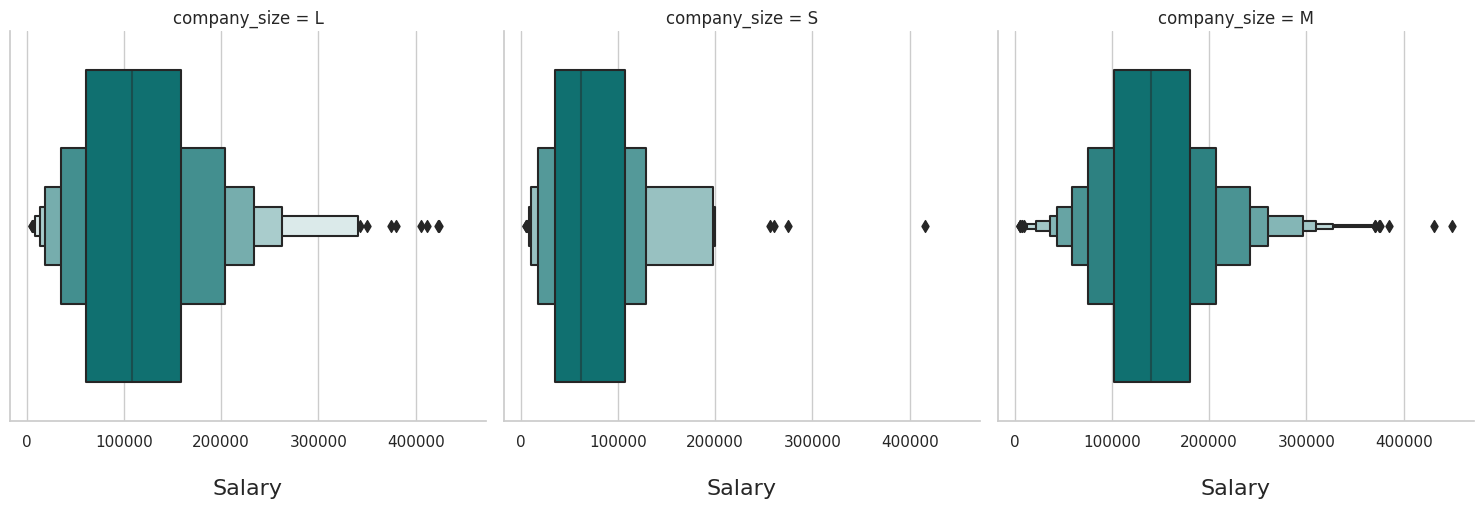

In [16]:
# using the sns.captplot to finding the company size, the Salarty in USD This help to how much a larger,small or medium company some one would make 
plt.figure(figsize=(8,4))

ax = sns.catplot(data=data_salary, x='salary_in_usd',  col='company_size', kind='boxen', color="teal")

ax.set_xlabels("\nSalary", fontsize =16)
plt.xticks(range(0,500000,100000));

Text(0.5, 1.0, 'Work Mode\n')

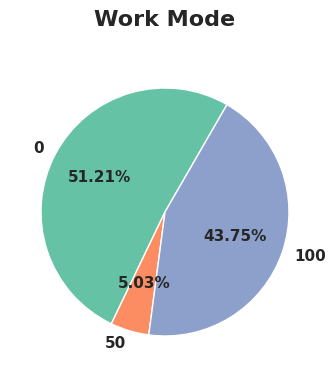

In [17]:
#Using the plot pie to the who works in in remote ratio to find the percentence
plt.figure(figsize=(4,6))
colors = sns.color_palette('Set2')[0:3]

values = data_salary.groupby('remote_ratio').size()
labels = values.index
#round(values/values.sum()*100, 2)

plt.pie(values, labels=labels, autopct='%1.2f%%', 
             startangle=60, textprops={'fontsize': 11, 'fontweight':"bold"},
             colors = colors)
plt.title("Work Mode\n", fontsize=16, fontweight="bold")

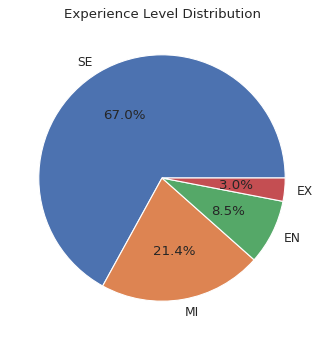

In [18]:
# Using the plot pier for the'Experience Level Distribution' using  experience level to find the percerntage
plt.figure(figsize=(6,5),dpi=80)
# calculate the number of individuals in each experience level
level_counts = data_salary['experience_level'].value_counts()

# create a pie chart
plt.pie(level_counts.values, labels=level_counts.index, autopct='%1.1f%%')

# add title
plt.title('Experience Level Distribution')

# display plot
plt.show()

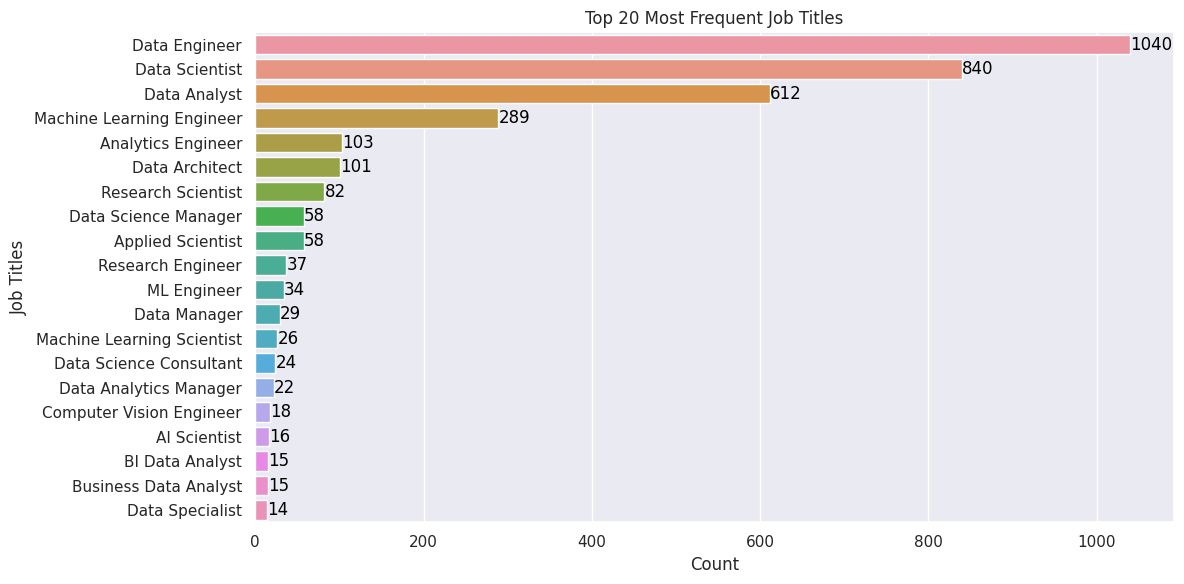

In [19]:
# Using the plot to define Top 20 Most Frequent Job Titles to see who is higher from Top 20 Most Frequent Job Titles and who lower from Top 20 Most Frequent Job Titles
# Extract the "job title" column
job_titles = data_salary['job_title']

# Calculate the frequency of each job title
title_counts = job_titles.value_counts()

# Extract the top 20 most frequent job titles
top_20_titles = title_counts.head(20)

# Create a DataFrame for the top 20 titles
top_20_df = pd.DataFrame({'Job Title': top_20_titles.index, 'Count': top_20_titles.values})

# Plotting the count plot
plt.figure(figsize=(12, 6))
sns.set(style="darkgrid")
ax = sns.barplot(data=top_20_df, x='Count', y='Job Title')
plt.xlabel('Count')
plt.ylabel('Job Titles')
plt.title('Top 20 Most Frequent Job Titles')

# Add count labels to the bars
for i, v in enumerate(top_20_df['Count']):
    ax.text(v + 0.2, i, str(v), color='black', va='center')

plt.tight_layout()
plt.show()

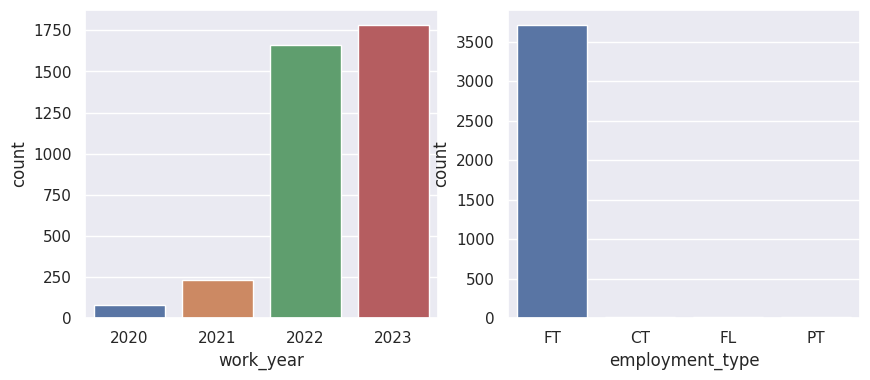

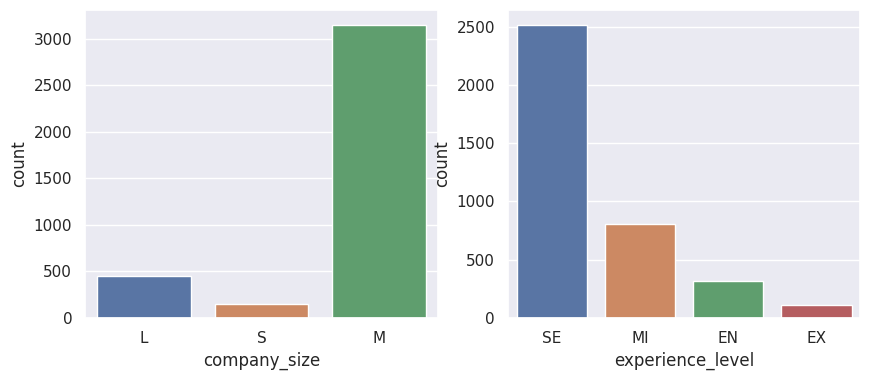

In [20]:
#Using the plot figute to ge the 'work_year','employment_type','company_size','experience_level' in four diffrence plot it helpfull on any finding a job or second job
categorical = ['work_year','employment_type','company_size','experience_level']
i = 0
while i < 4:
    fig = plt.figure(figsize=[10,4])
    plt.subplot(1,2,1)
    sns.countplot(x=categorical[i],data=data_salary)
    i += 1
    plt.subplot(1,2,2)
    sns.countplot(x=categorical[i],data=data_salary)
    i += 1
    plt.show()

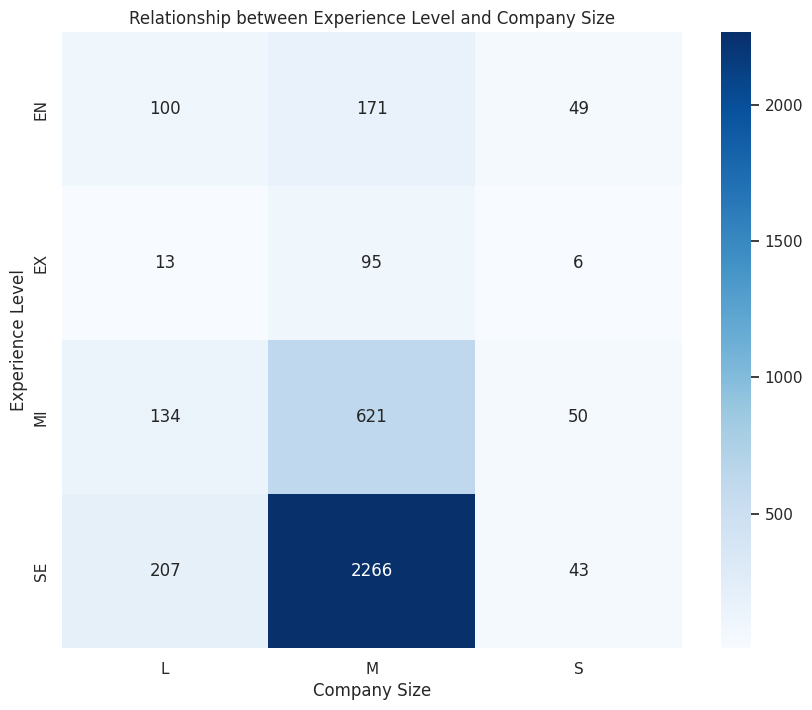

In [21]:
#using the pd.crosstab to use the experince level and company size to get the Relationship between Experience Level and Company Size
# Create a cross-tabulation of the two columns
cross_tab = pd.crosstab(data_salary['experience_level'], data_salary['company_size'])

# Create a heatmap using the cross-tabulation data
plt.figure(figsize=(10, 8))
sns.heatmap(cross_tab, annot=True, fmt="d", cmap='Blues')

plt.xlabel('Company Size')
plt.ylabel('Experience Level')
plt.title('Relationship between Experience Level and Company Size')

plt.show()

<Axes: xlabel='salary_in_usd', ylabel='salary'>

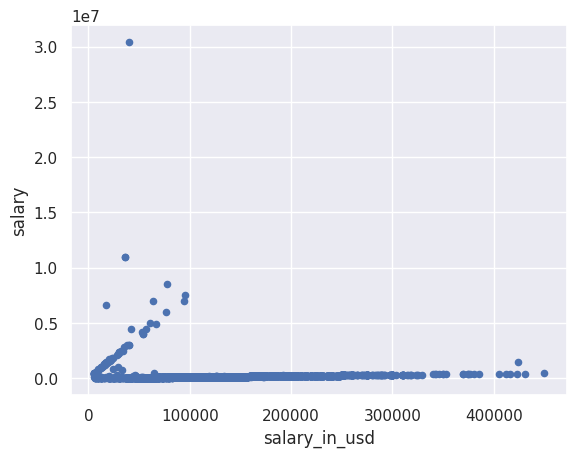

In [22]:
# Using the plot to compare the salary and salary in the USD
data_salary.plot(kind='scatter', x = 'salary_in_usd', y = 'salary')

<Axes: xlabel='salary_in_usd', ylabel='salary_currency'>

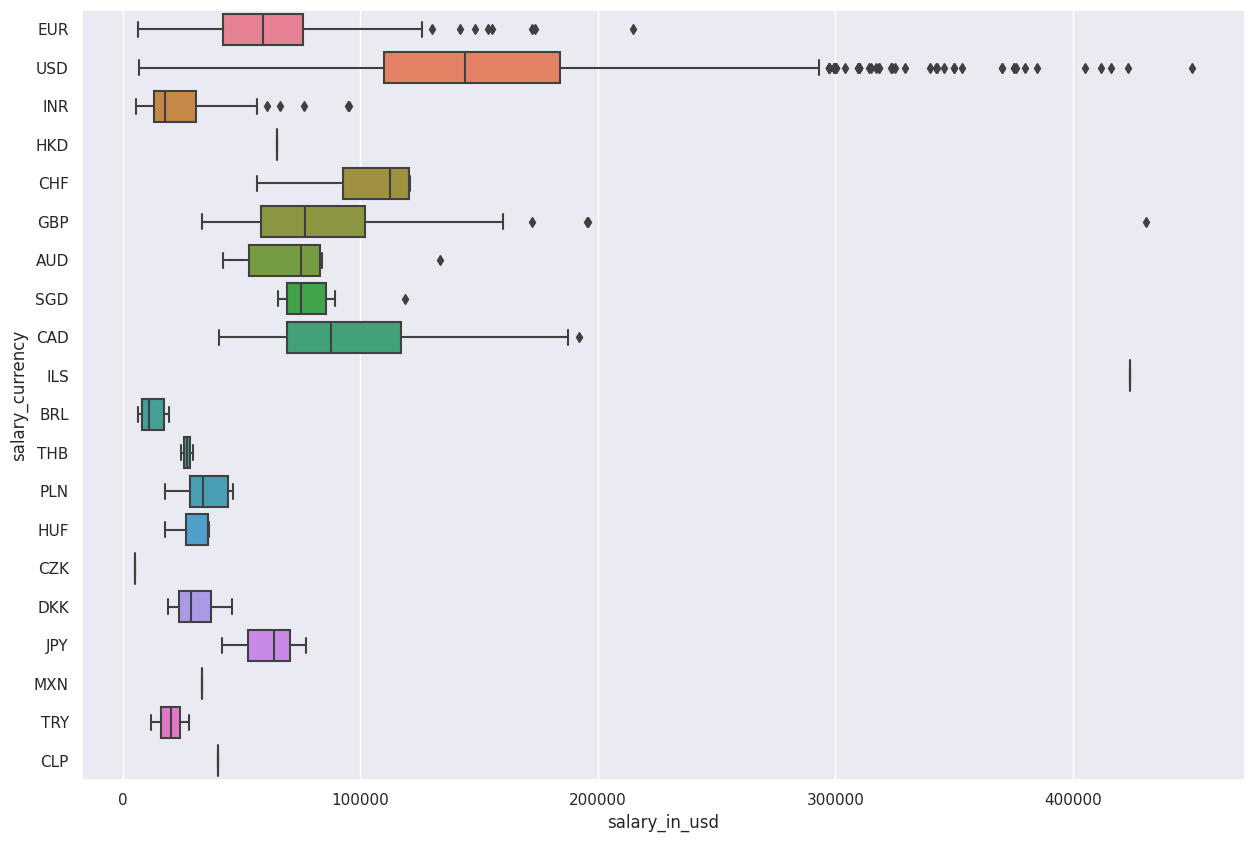

In [23]:
#Using the boxplot to ge the salary currency and the salary in USD
plt.figure(figsize=(15,10))
sns.boxplot(x='salary_in_usd', y='salary_currency', palette='husl', data=data_salary)

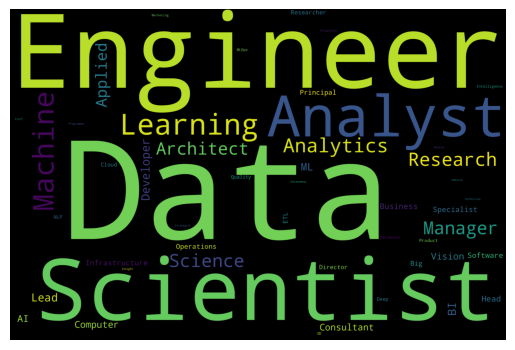

<Figure size 1600x1200 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 1600x1200 with 0 Axes>

In [24]:
# Using the figure for nice look for the project with the job titles
#!pip install wordcloud
from wordcloud import WordCloud

text = data_salary['job_title'].values
text = ' '.join(text)


wordcloud = WordCloud(width = 3000, height = 2000, collocations=False, colormap= 'viridis', 
                      random_state=1, max_words=50, background_color="black").generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.tight_layout(pad = 0) 
plt.figure(figsize=[16,12])